<a href="https://colab.research.google.com/github/DomjanKatarina/House-Pricing-Kaggle-Competition/blob/main/the_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The project's workflow

**STEP 1: Getting familiar with data**

Reading the metadata and understanding the meaning of each column. 

Determining the:
- type of each column and its correctness
- range (continuous) or discrete values of each column and their correctness
- detecting missing values and correction of those
- detecting outliers and handling those

"""

Have commented and ready the code for
- converting from type 1 to type 2 
- grouping categorical/continuous values into list

"""

---
**STEP 2: Predictive models**

Use predicitve models such as:
- Linear regression
- XGBoost
- Deep Learning Algorithm (NN, LSTM)
- Time Series Algorithm

For each model have:
- Have a quick summary of how the model works and it's assumptions.
- Data preprocessing for the model.
- Optimization function of parameters that returns the best model
- Checking the assumtions of the model
- Model validation by using the same metric for all
- Quick model comparisment with each previous model

---
**STEP 3: Simulation and Final Prediction**

- Create a simulation or back testing function for the predictive models (one for all or each its own). 
- Validate each model's preformance
- Essemble or simply choose the best prediction. 


1. Getting familiar with data
> 1. Independent variable analysis
> 2. Dependent variable analysis
> 3. Relationship between independent and dependent variables

In [2]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/DomjanKatarina/House-Pricing-Kaggle-Competition/main/Dataset/train.csv', index_col=0)
df_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#df_train.shape  #(1460, 80)
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Getting familiar with data

### Independent variable analysis

1. Determening the correct type of columns
2. Observing the values of each categorical and numerical columns
3. Managing missing values
4. Managing outliers

Reading the `data_description.txt` we get deeper insight of the variables. I've generated the `house_prices_variable_analysis.xlsx` determining the type of variable (*numerical*/*categorical)*, and adding a few comments, where I expect missing values and warnings of data leakage, so it's avoided when building predictive models.

#### 1. Determining the correct column types

We must set the right data type for each column or it can skew our further analysis.

In [5]:
cat_var_v1 = list(df_train.select_dtypes(include=['object', 'category']).columns)  
num_var_v1 = list(df_train.select_dtypes(include=['number']).columns)

print("Categorical variables: ", len(cat_var_v1), cat_var_v1)
print("Numerical variables: ", len(num_var_v1), num_var_v1)

Categorical variables:  43 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical variables:  37 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars'

Comparing the categorical and numerical variables with the column `Type` from the `house_prices_variable_analysis.csv`, we notice that there are some variables that are actually categories and are taken as numerical in the dataframe. We must change their types to category. 

Variables that have discrete numerical type (such as number of bathrooms, or month sold) we will also convert into categorical.  

In [20]:
should_be_cat = ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']
for var in should_be_cat:
    df_train[var] = df_train[var].astype('category',copy=False)   # Other possible types: 'int64', 'float64', 'object' 

In [21]:
cat_var = list(df_train.select_dtypes(include=['object', 'category']).columns)  
num_var = list(df_train.select_dtypes(include=['number']).columns)
num_var.remove('SalePrice')

print("Categorical variables: ", len(cat_var), cat_var)
print("Numerical variables: ", len(num_var), num_var)

Categorical variables:  60 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
Numerical variables:  19 ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQua

#### 2. Values of variables

We will now check the values of each independent variable to detect anomalies, outliers and missing values.

Starting with categorical variables and continuing with numeric variables.

In [ ]:
for i, var in enumerate(cat_var):
  plt.figure(i)
  ax = sns.countplot(x=var, data=df_train) # Counting the gender variable
  ax.set_title(var) # Setting the title
  ax.tick_params(axis='x', rotation=45)

In [47]:
# Let's check variables YearBuilt, YearRemodAdd and GarageYrBlt seperetly
print(sorted([int(x) for x in list(df_train['YearBuilt'].unique())]))
print(sorted([int(x) for x in list(df_train['YearRemodAdd'].unique())]))
print(sorted([float(x) for x in list(df_train['GarageYrBlt'].unique())]))  #it has a missing values

[1872, 1875, 1880, 1882, 1885, 1890, 1892, 1893, 1898, 1900, 1904, 1905, 1906, 1908, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 20

For categorical variables everything looks okay. There is no mispelled entries and all the values look in the right and logical range. 

Let's continue with numerical variables.

<Figure size 432x288 with 0 Axes>

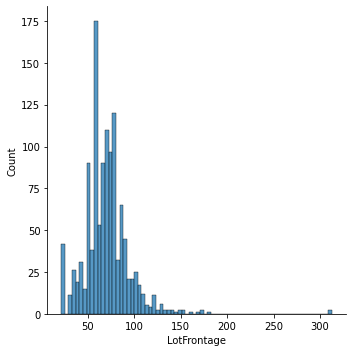

<Figure size 432x288 with 0 Axes>

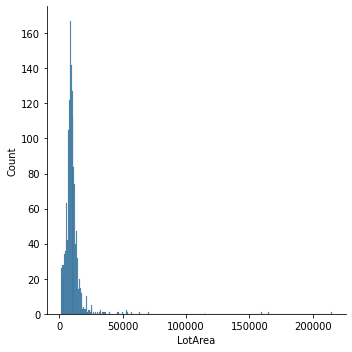

<Figure size 432x288 with 0 Axes>

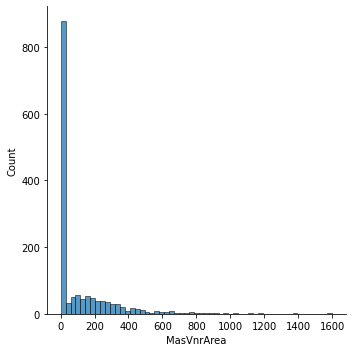

<Figure size 432x288 with 0 Axes>

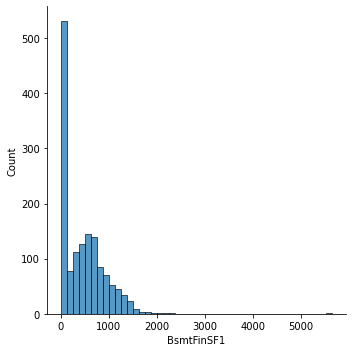

<Figure size 432x288 with 0 Axes>

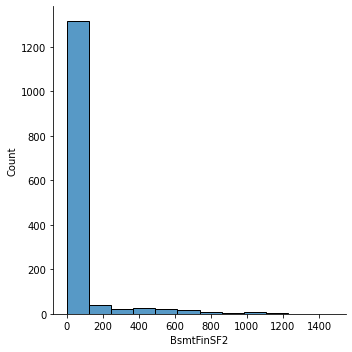

<Figure size 432x288 with 0 Axes>

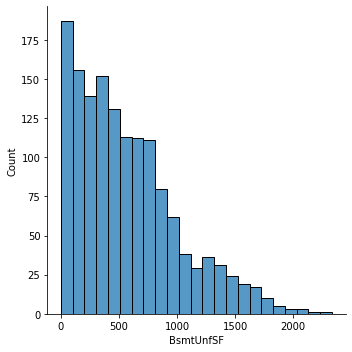

<Figure size 432x288 with 0 Axes>

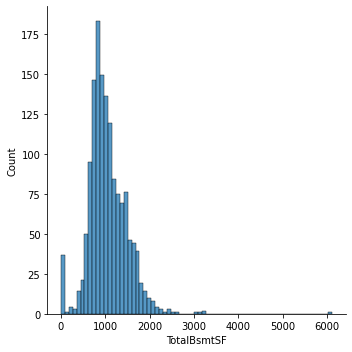

<Figure size 432x288 with 0 Axes>

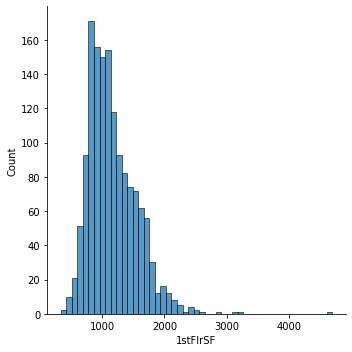

<Figure size 432x288 with 0 Axes>

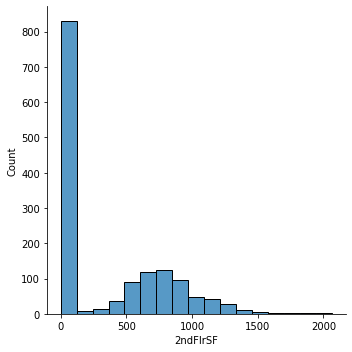

<Figure size 432x288 with 0 Axes>

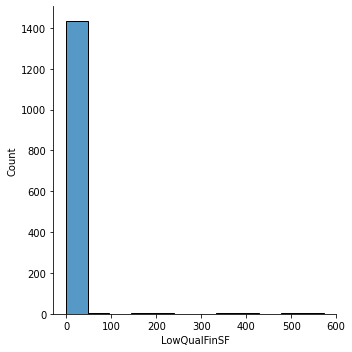

<Figure size 432x288 with 0 Axes>

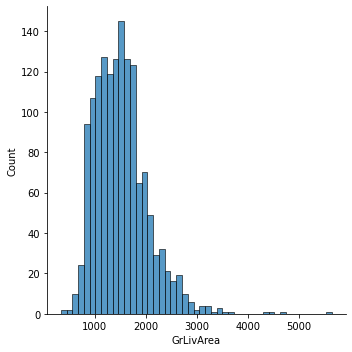

<Figure size 432x288 with 0 Axes>

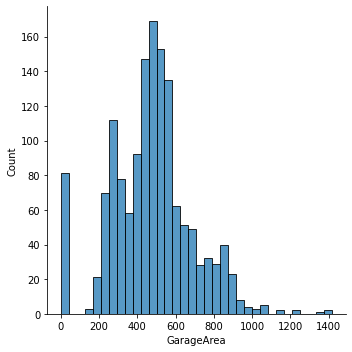

<Figure size 432x288 with 0 Axes>

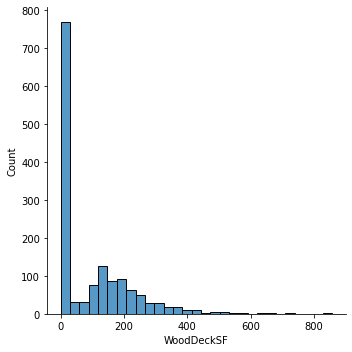

<Figure size 432x288 with 0 Axes>

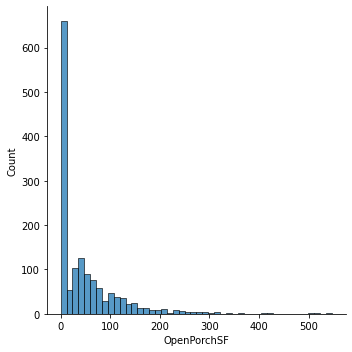

<Figure size 432x288 with 0 Axes>

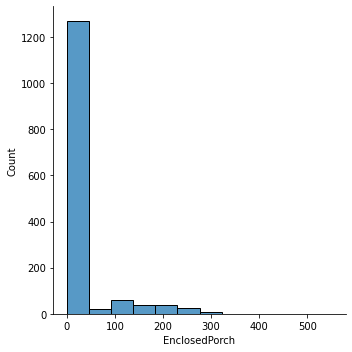

<Figure size 432x288 with 0 Axes>

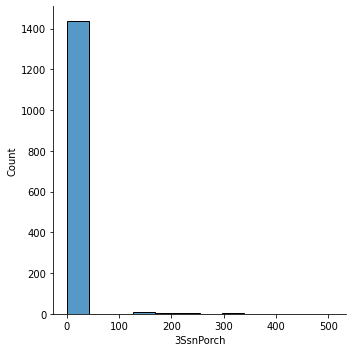

<Figure size 432x288 with 0 Axes>

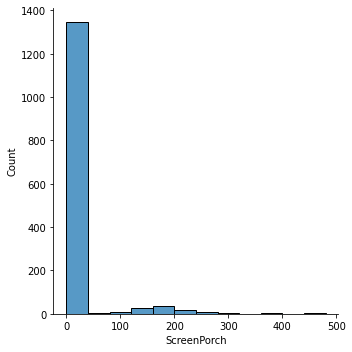

<Figure size 432x288 with 0 Axes>

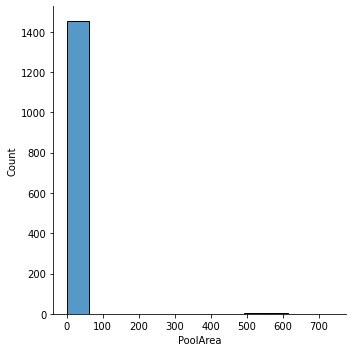

<Figure size 432x288 with 0 Axes>

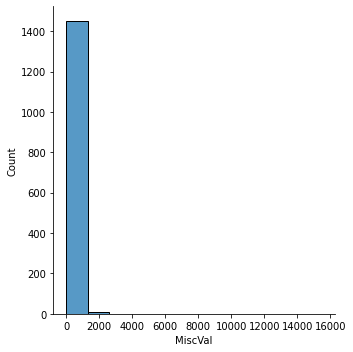

In [48]:
for i, var in enumerate(num_var):
  plt.figure(i)
  ax = sns.displot(df_train[var], kde=False)  # kde=False doesn't plot the curve
  plt.show()

All numerical variables have values above 0 so we do not have error with this. We notice that quite a few variables have outliers and that a lot of variables have their categorical twin, for example, `PoolArea` and `PoolQC`. As `PoolArea` has a lot of zeros, we expect `PoolQC` to have a lot of missing values.

#### 3. Managing missing values

### Dependent variable analysis `SalePrice`


In [32]:
df_train['SalePrice'].describe

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The minimum value is positive. There is no error in data in this part.

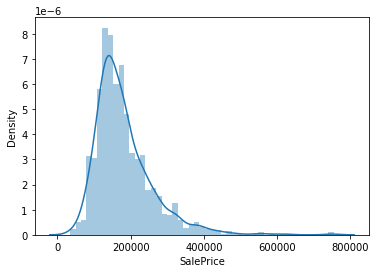

In [33]:
sns.distplot(df_train['SalePrice'])

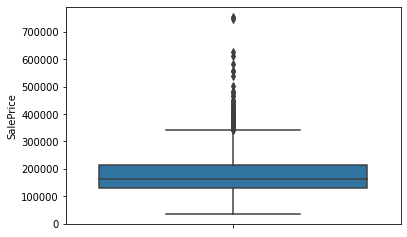

In [34]:
sns.boxplot(y=df_train['SalePrice'])

`SalePrice` deviates from normal distribution, it's right-tailed and has a strong peak.

In [35]:
print("Skewness: ", df_train['SalePrice'].skew())
print("Kurtosis: ", df_train['SalePrice'].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


**Skewness** is a measure of symmetry, or more precisely, the lack of symmetry.
- Symmetric data should have a skewness near zero. 
- *Negative* values for the skewness indicate data that are skewed *left*.
- *Positive* values for the skewness indicate data that are skewed *right*. 
- If the data are multi-modal, then this may affect the sign of the skewness.
> Our skewness value is `1.883`, detecting the skewness on the right (also seen in the histogram).

**Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. 
- Data sets with *high* kurtosis tend to have heavy tails, or outliers. 
- Data sets with *low* kurtosis tend to have light tails, or lack of outliers.
> Our kurtosis value is `6.536` indicating heavy tails. Observing the histogram it has a heavy right tail.

*Warning:* Skewness and kurtosis measures can be disorted by extreme values in the tails (as the mean and standard deviation).

### Relationship between independent and dependent variables

#### Numerical independent variables and dependent variable `SalePrice`

We will use correlation matrix (heatmap) and scatterplots to explore the relationships.

80


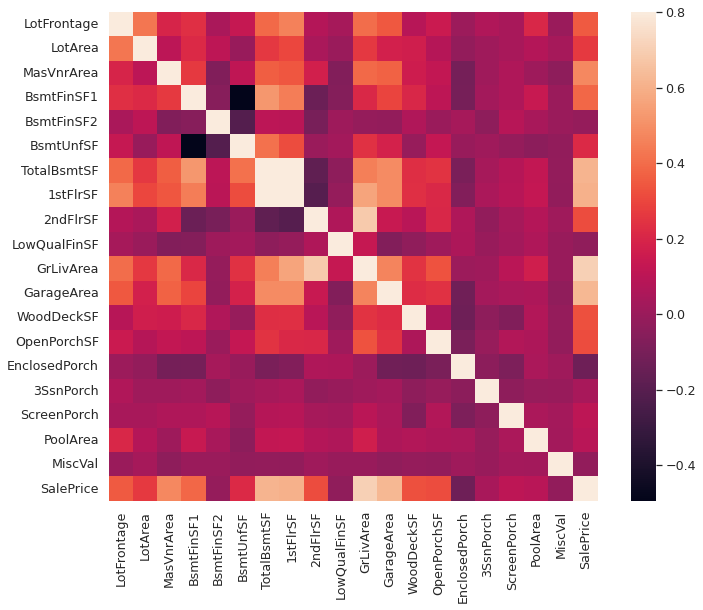

In [53]:
corrmat = df_train.corr()
print(len(df_train.columns))
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)

We can notice there is some strong correlation between `TotalBsmtSF` and `1stFlrSF`.

Observing our dependant variable `SalePrice` we notice there are a few independent variables that it has some corr
elation with. Lets take a closer look to the first 5 most correlated variables.

Index(['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF'], dtype='object')


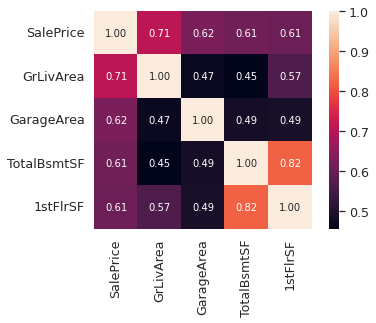

In [62]:
cols = corrmat.nlargest(5, 'SalePrice')['SalePrice'].index  # Get first 10 variables that are most correlated with SalePrice
print(cols)
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.15)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The most correlated independent numerical variable is `GrLivArea`, followed by `GarageArea` which is highly correlated as well with `TotalBsmtSF`. We want to keep an eye on these two to avoid multicolinearity.

Let's plot some scatterplots between these variables.

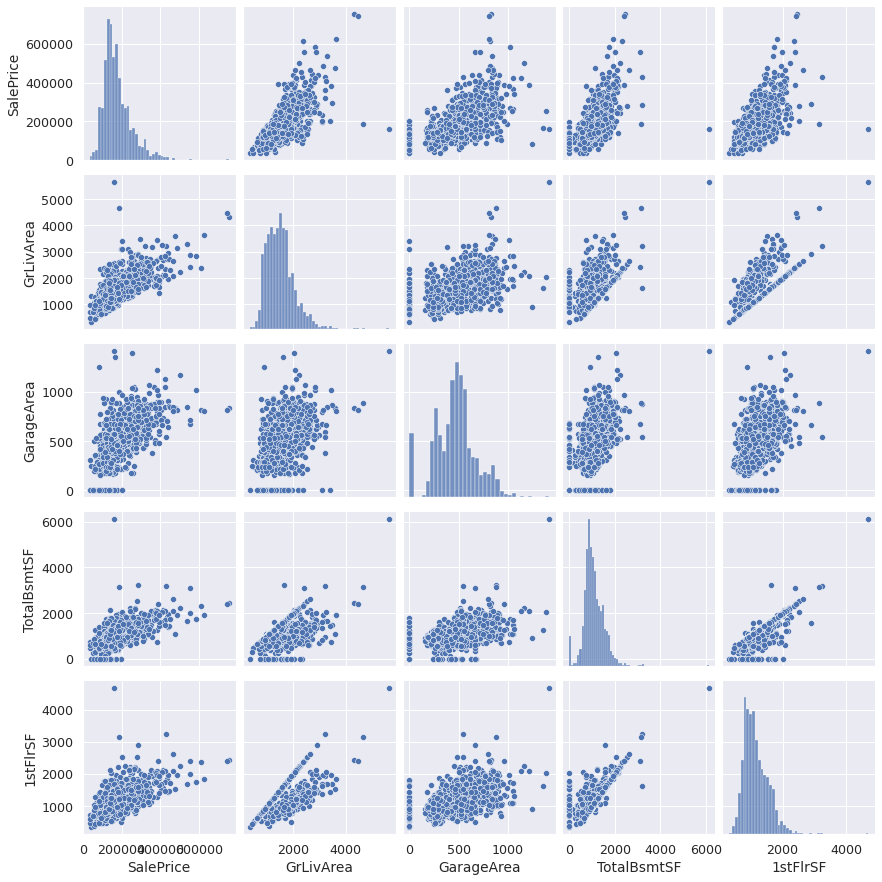

In [63]:
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Let's plot scatterplots for all numerical variables to check for outliers.

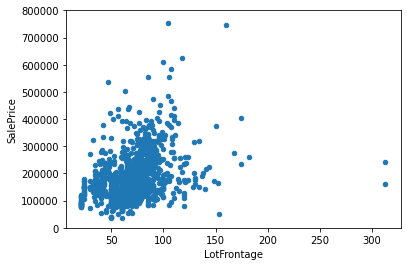

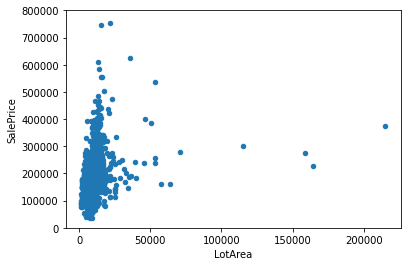

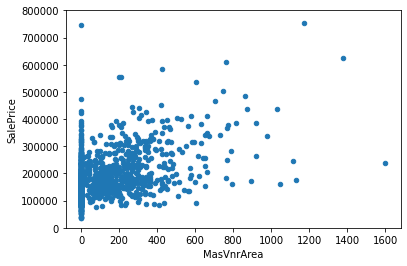

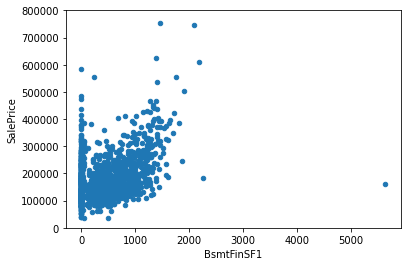

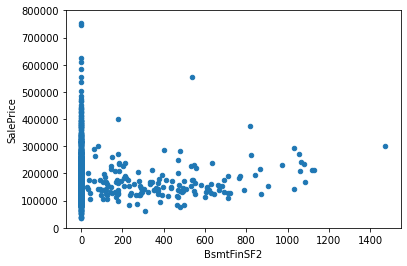

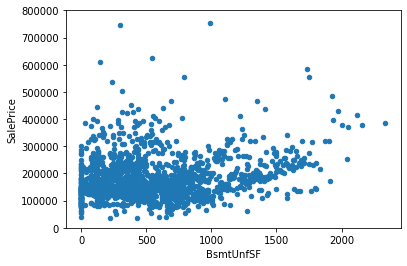

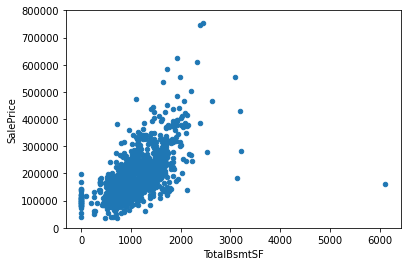

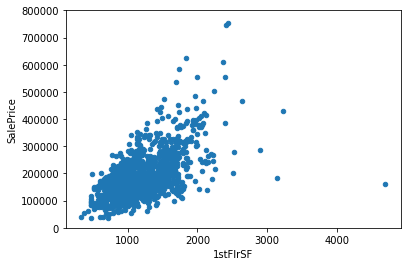

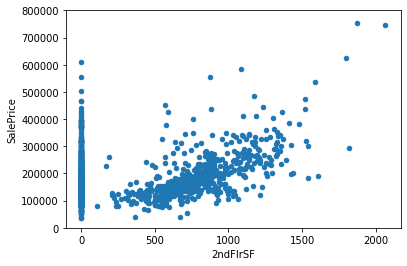

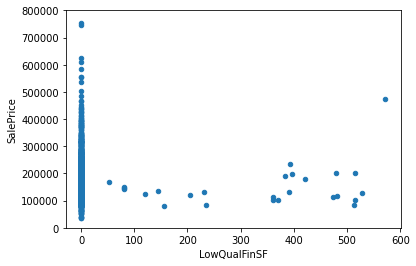

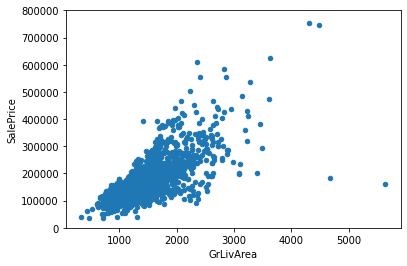

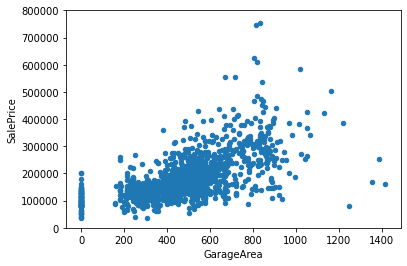

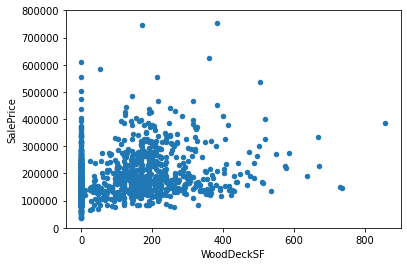

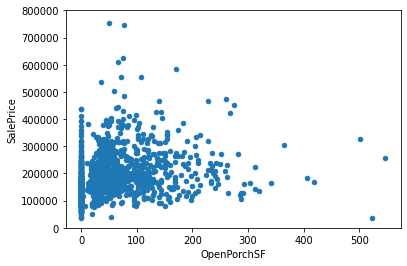

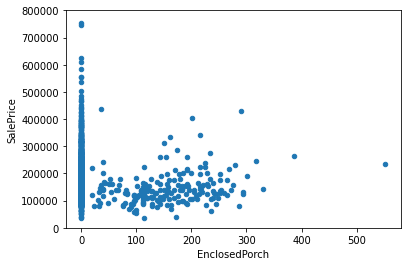

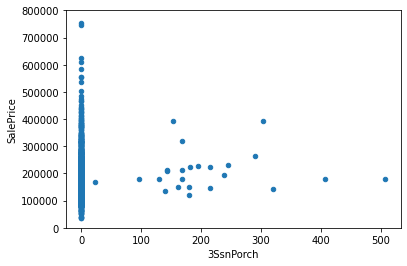

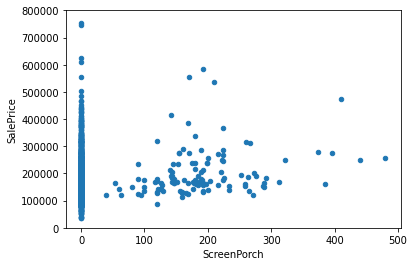

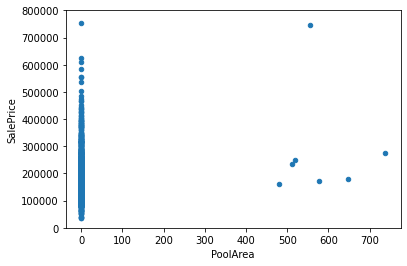

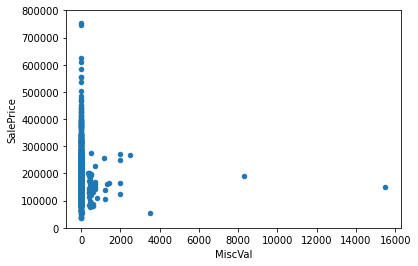

In [65]:
for var in num_var:
  data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
  data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We notice there are some critical variables that indicate outliers (`MiscVal`, `PoolArea`, `BsmtFinSF1`). 

We plotted a scatter plot between dependent variable `SalePrice` and each of the 19 numerical variables. We notice the following:
1. There is a noticable linear relationship between `SalePrice` and `1stFlrSF`, `GrLivArea` and `GarageArea`. 
2. Variables that have a noticable vertical straight line at 0 probably have missing values in their associated categorical variables and that needs to be handled.
3. There are noticable outliers in some of the variables.

#### Categorical independent variables and dependent variable `SalePrice`

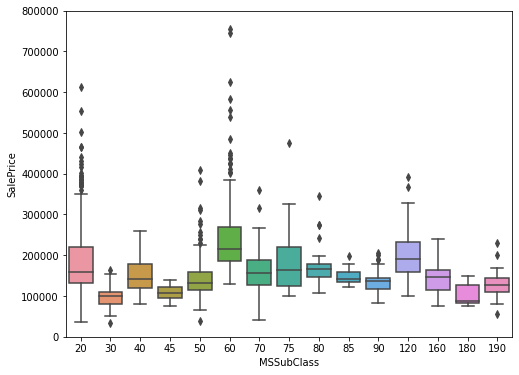

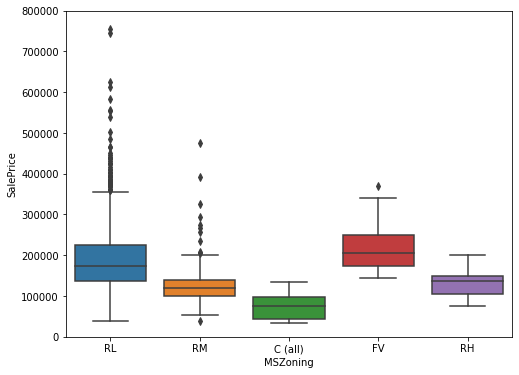

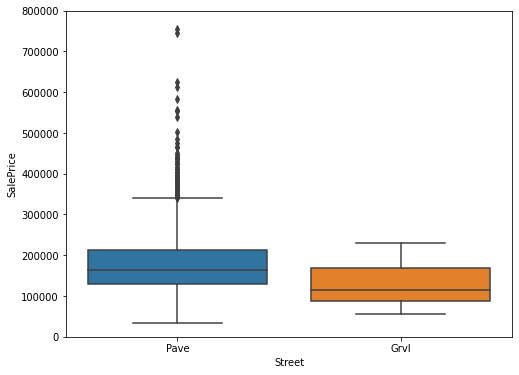

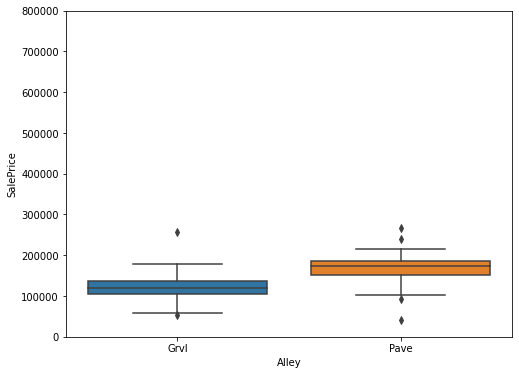

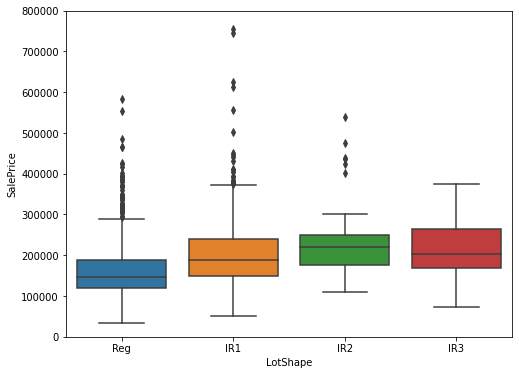

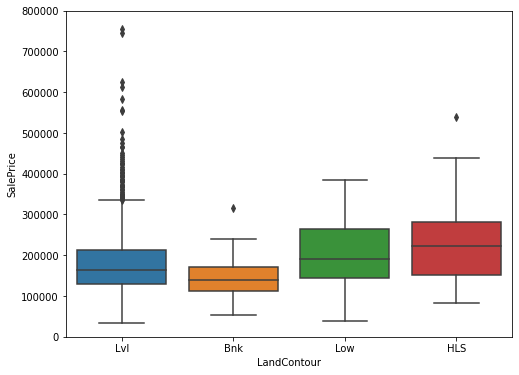

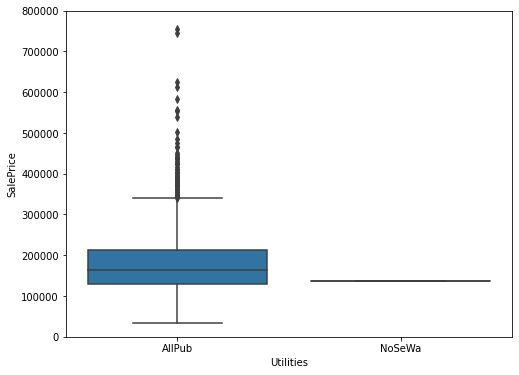

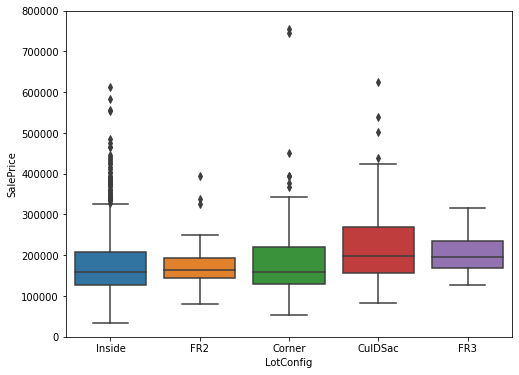

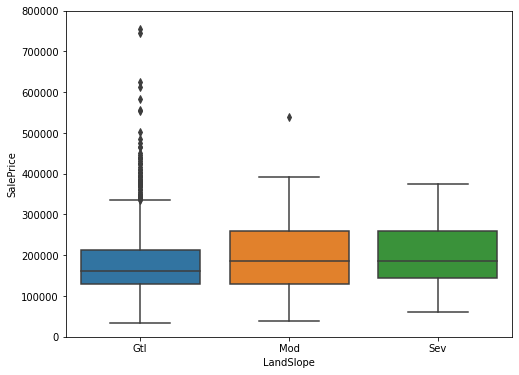

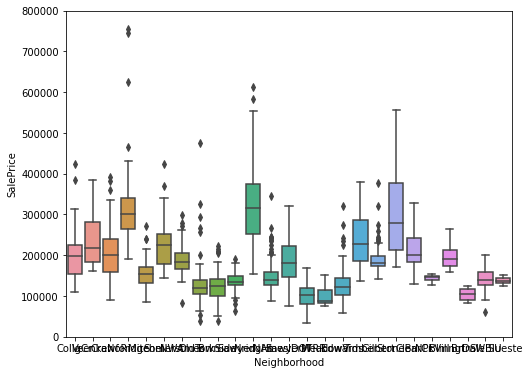

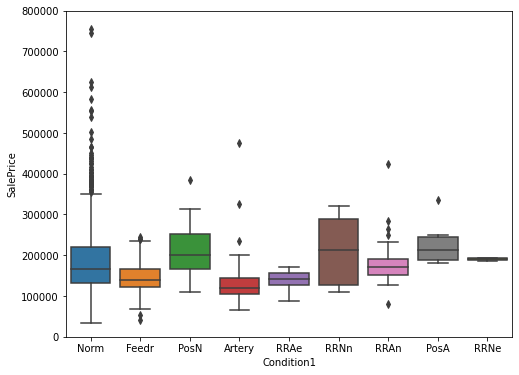

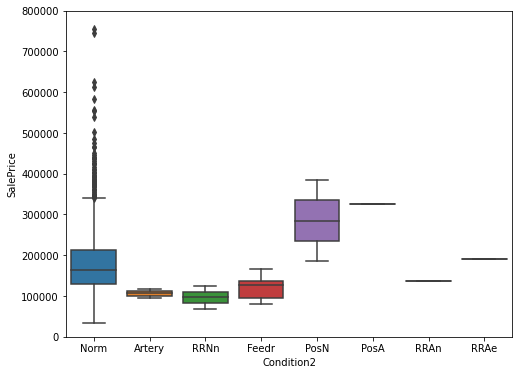

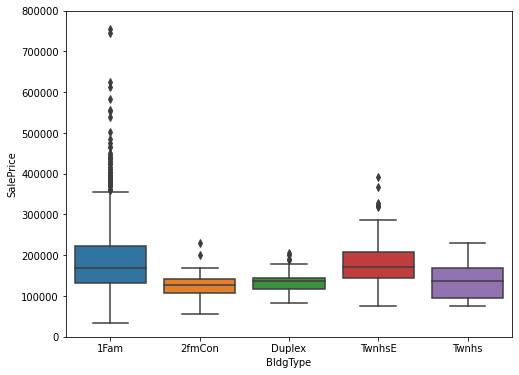

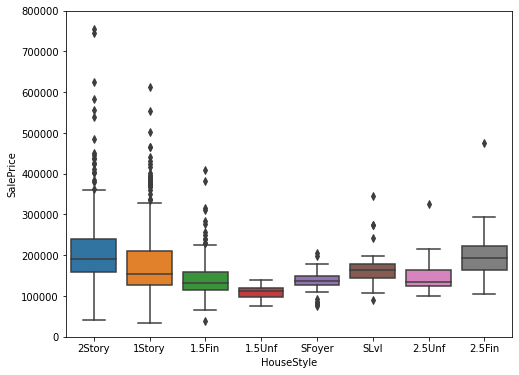

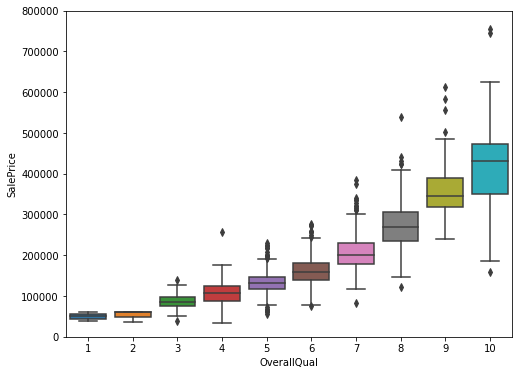

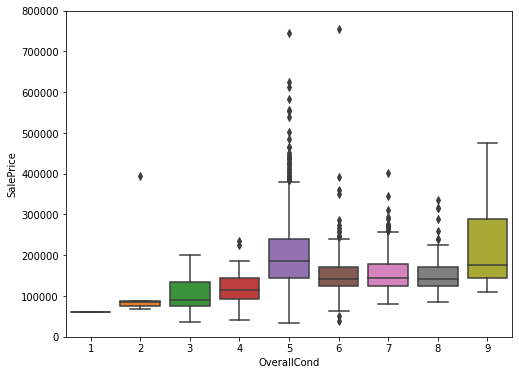

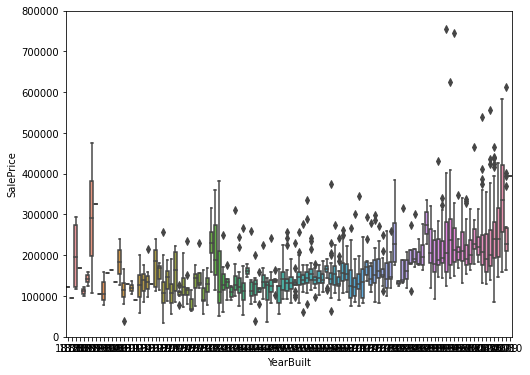

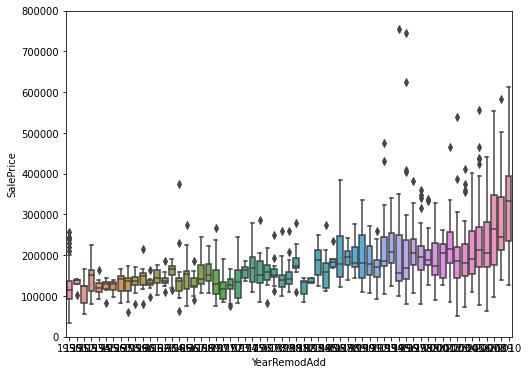

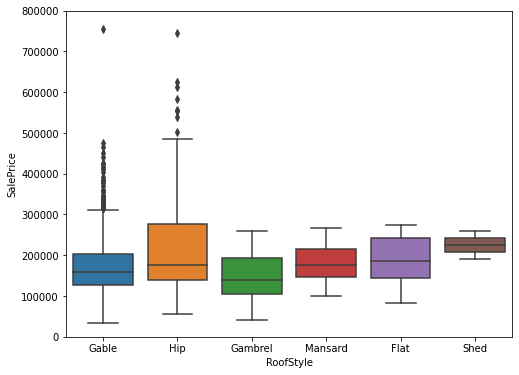

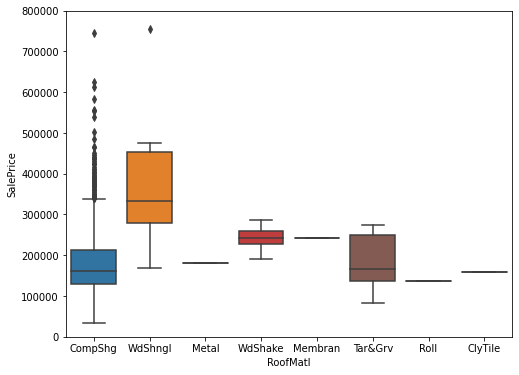

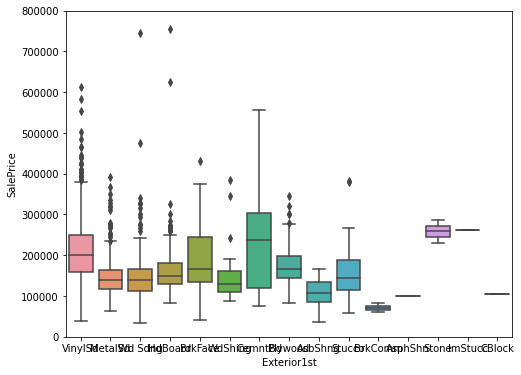

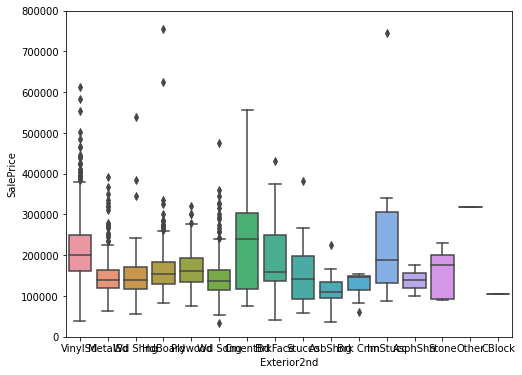

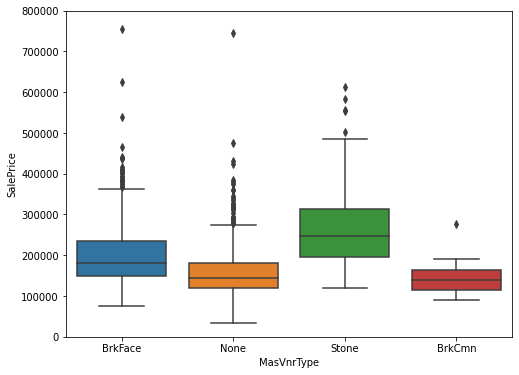

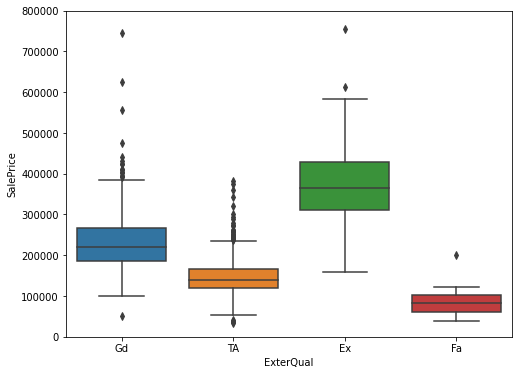

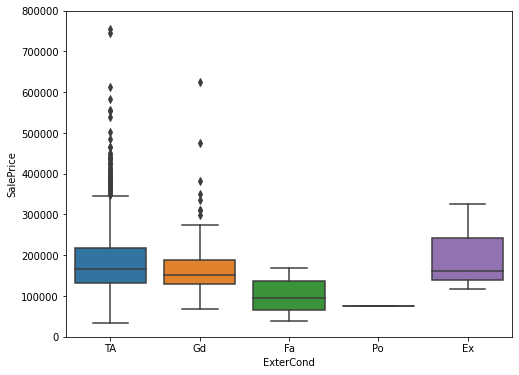

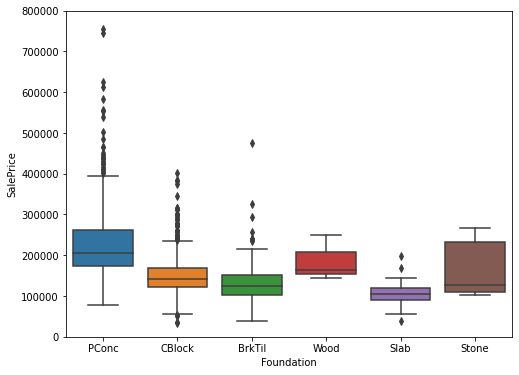

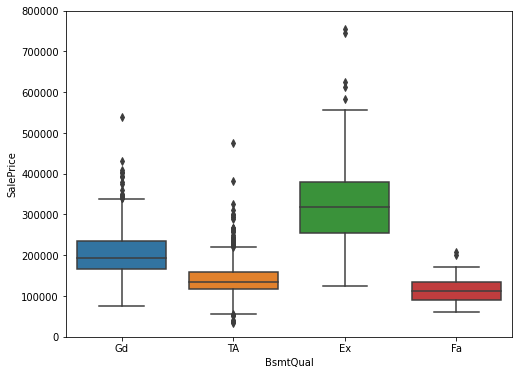

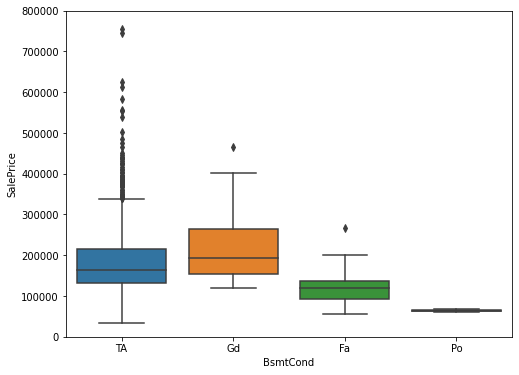

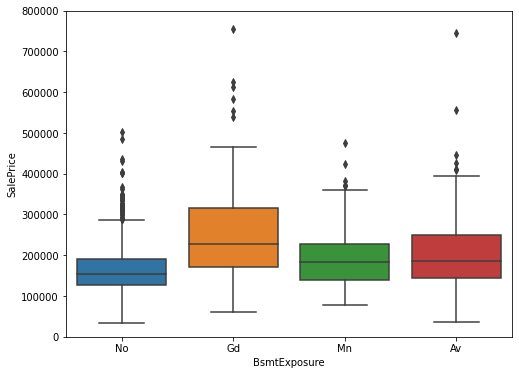

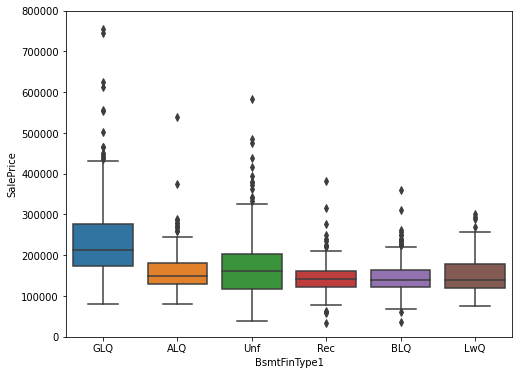

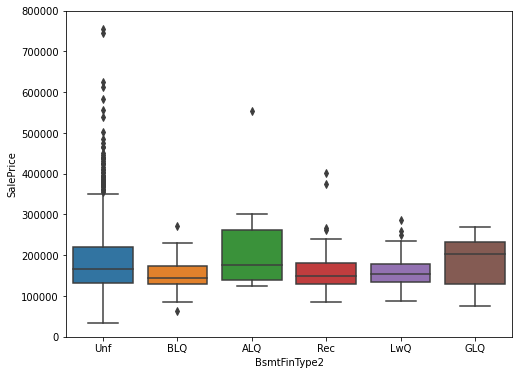

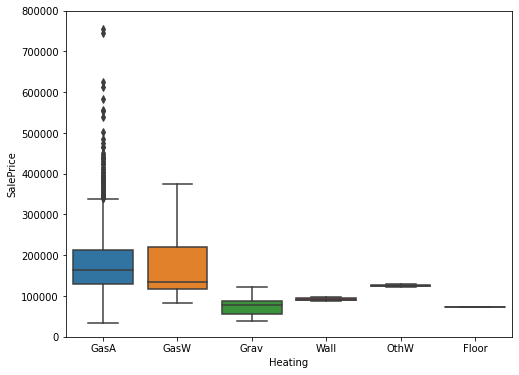

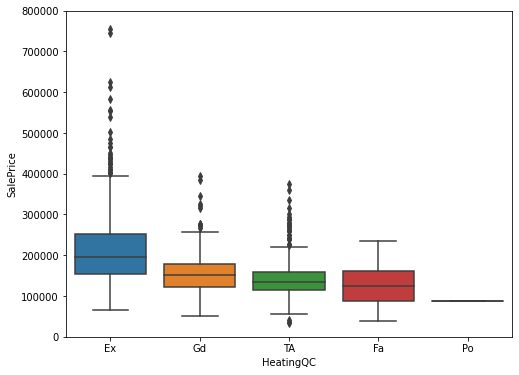

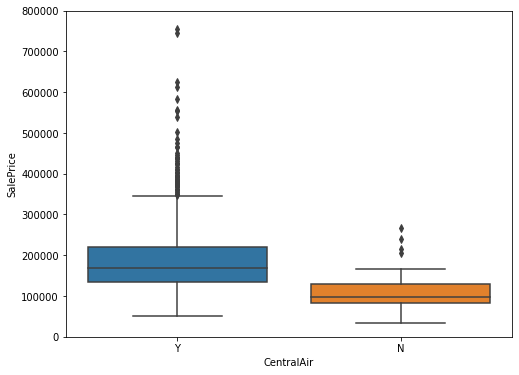

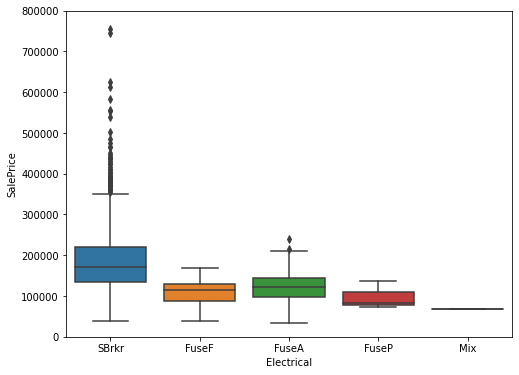

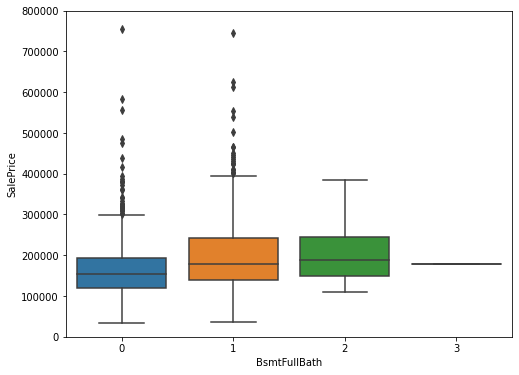

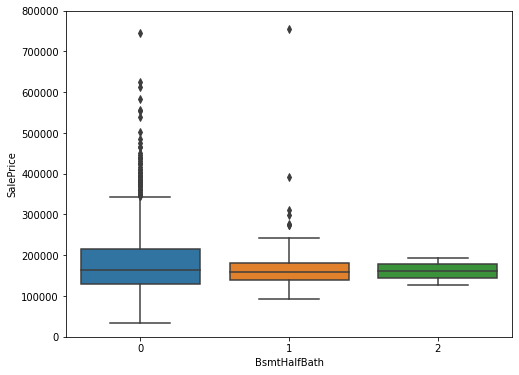

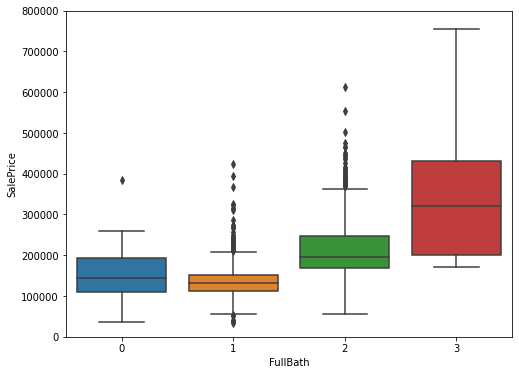

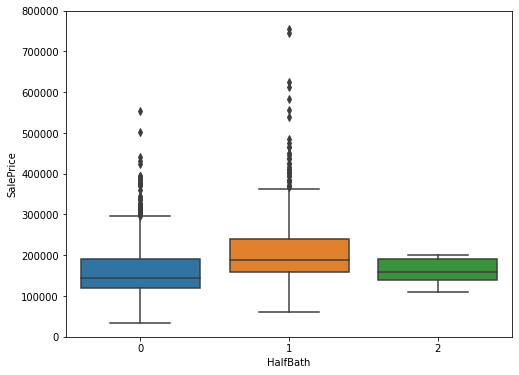

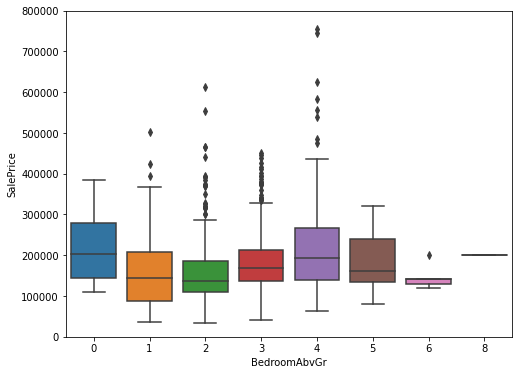

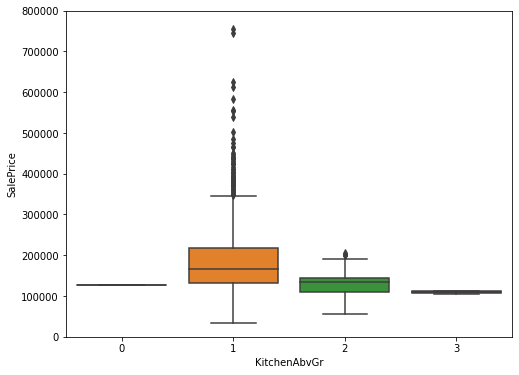

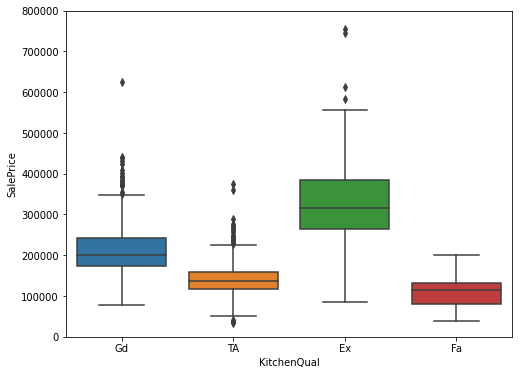

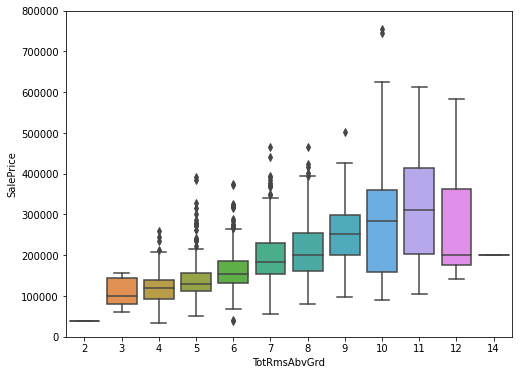

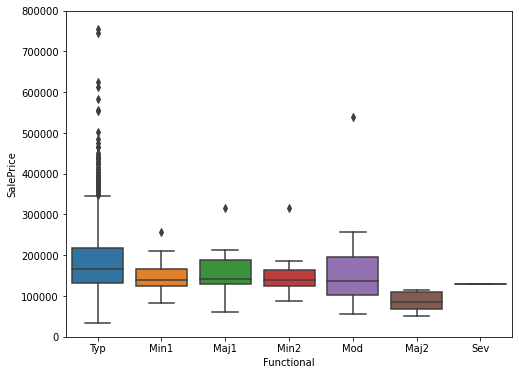

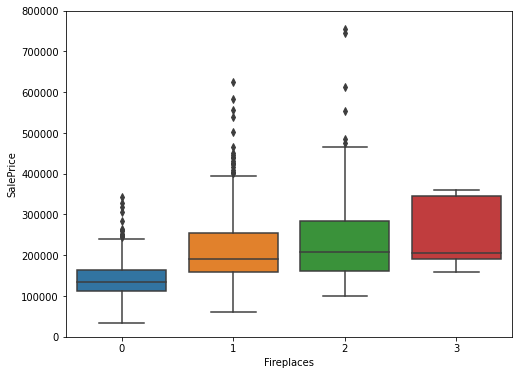

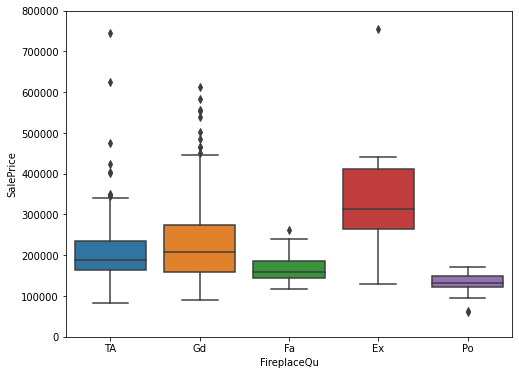

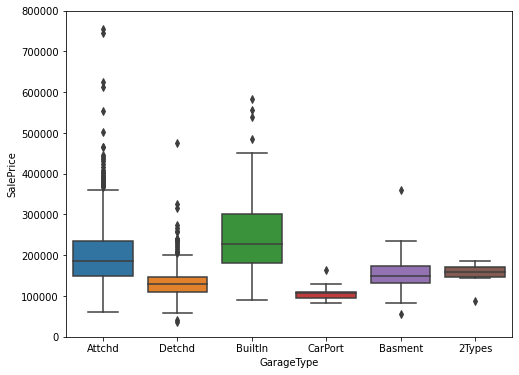

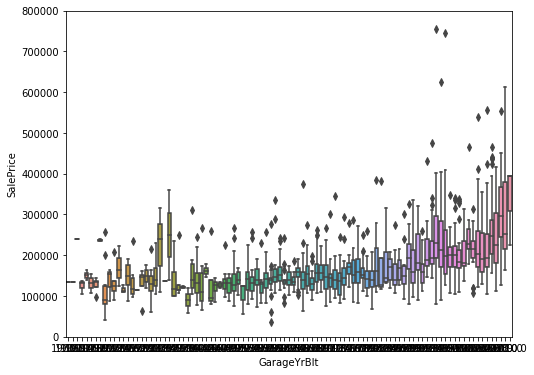

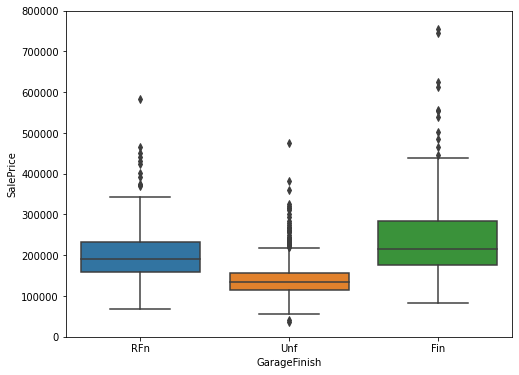

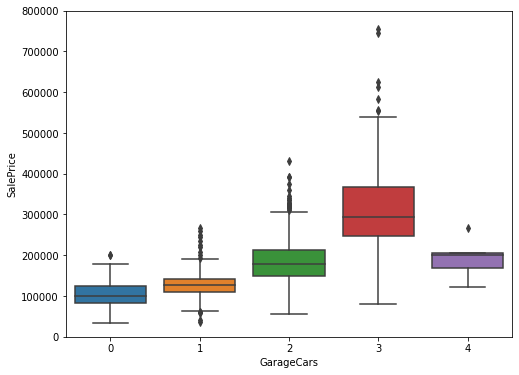

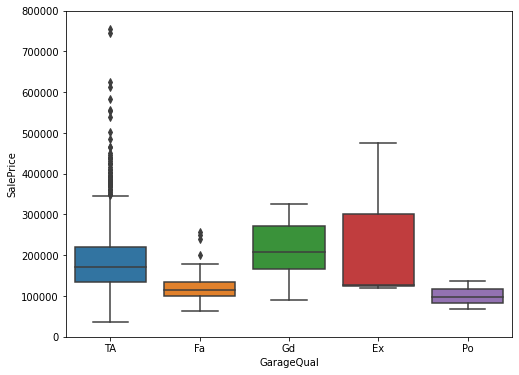

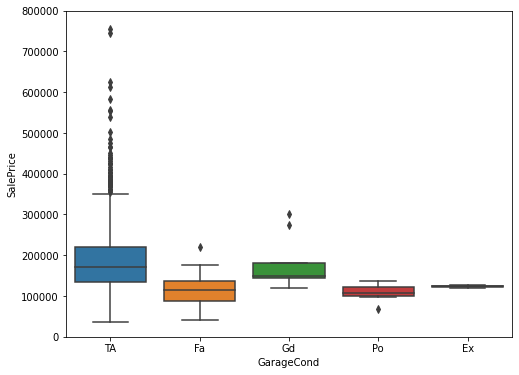

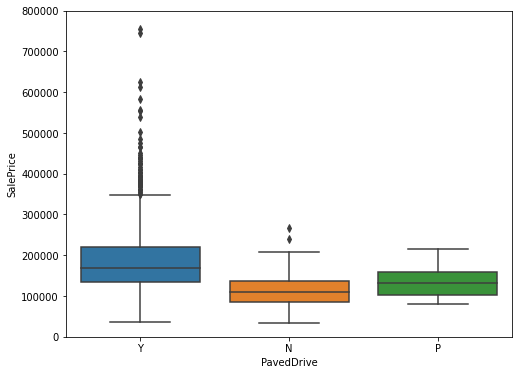

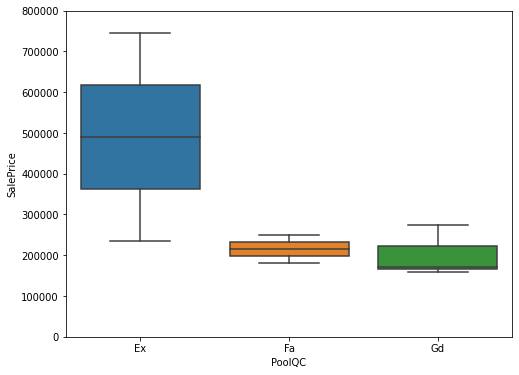

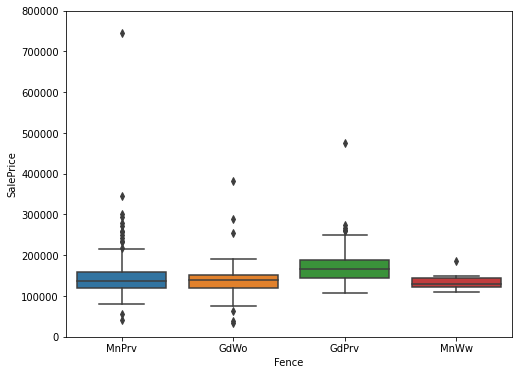

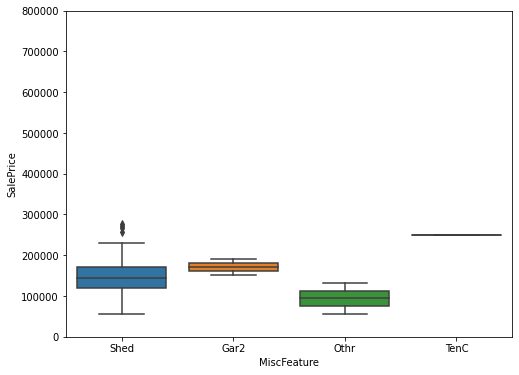

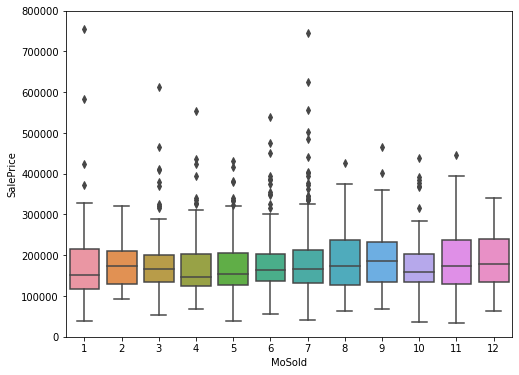

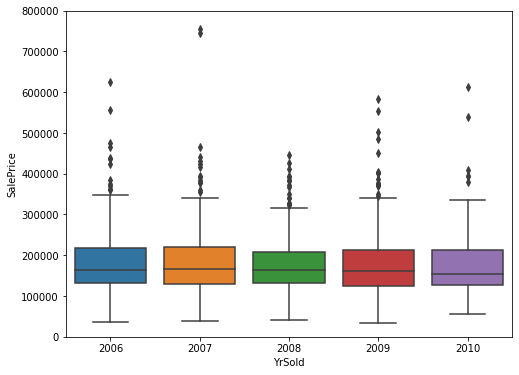

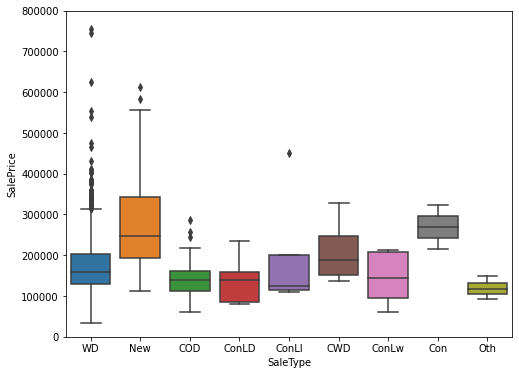

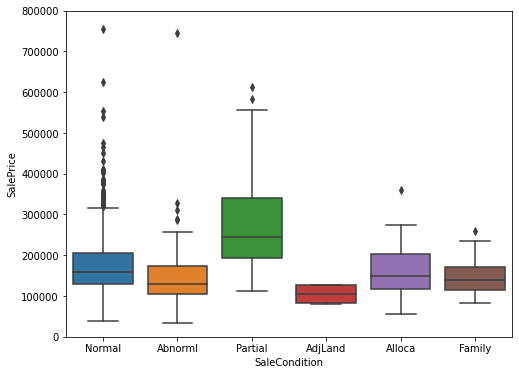

In [67]:
for var in cat_var:
  data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
  f, ax = plt.subplots(figsize=(8, 6))
  fig = sns.boxplot(x=var, y="SalePrice", data=data)
  fig.axis(ymin=0, ymax=800000)

We plotted a box plot between dependent variable `SalePrice` and each of the categorical independent variables. We noticed the following:
1. We can notice a differnce between means of classes for the variables such as:
- `FullBath`, where class `3` has higher mean that the others
- `ExterQual`, where class `Excellent Quality` has higher mean that the others
- `Neighbourhood`

> `ANOVA` test is needed to determine if the difference between the means is statistically significant. But this would be needed in case of desire to determine which variable is influencing the dependent variable `SalePrice`. When the main goal is prediction, the model will handle that itself. For now we are just exploring around to get to know the story better.

2. There is a noticable positive trend in `OverallQual`, and a slight positive trend `YearBuilt`, `YearRemodAdd` and `GarageYrBlt`, where a positive trend from `GarageYrBlt` can be influenced by `YearBuilt` and/or `YearRemodAdd`.  




### Missing data

In [79]:
# Scatterplot do not display missing values
missing = df_train.isna().sum().sort_values(ascending = False)/df_train.shape[0]
missing = missing[missing > 0]
missing

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

The variables `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `FireplaceQu` and `LotFrontage` have more than 15% of the data missing. Let's explore the values of these variables and the relationship with the dependent variable `SalePrice`.

In [85]:
vars = ['PoolQC', 'MiscFeature', 'Alley', 'FireplaceQu', 'Fence', 'LotFrontage']
print(df_train[vars].dtypes) # They are all categorical variables except LotFrontage

PoolQC          object
MiscFeature     object
Alley           object
FireplaceQu     object
Fence           object
LotFrontage    float64
dtype: object


In [88]:
for v in vars:
  df_vars_count = df_train[v].value_counts(dropna=False)
  print(df_vars_count, '\n')

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64 

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64 

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64 

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64 

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64 

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: LotFrontage, Length: 111, dtype: int64 



By the amount of missing values we can drop columns `PoolQC`, `MiscFeature`, `Alley` and `Fence`.

(-0.5, 4.5, 0.0, 800000.0)

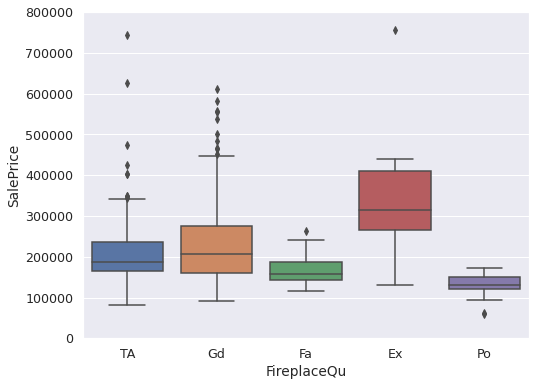

In [90]:
data = pd.concat([df_train['SalePrice'], df_train['FireplaceQu']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='FireplaceQu', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

0.3517990965706781


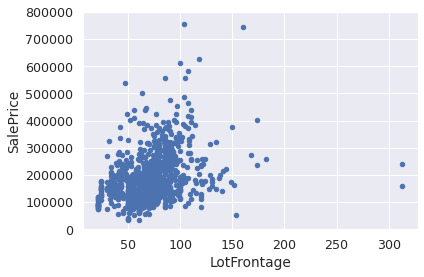

In [93]:
data = pd.concat([df_train['SalePrice'], df_train['LotFrontage']], axis=1)
data.plot.scatter(x='LotFrontage', y='SalePrice', ylim=(0,800000));
print(df_train['SalePrice'].corr(df_train['LotFrontage']))

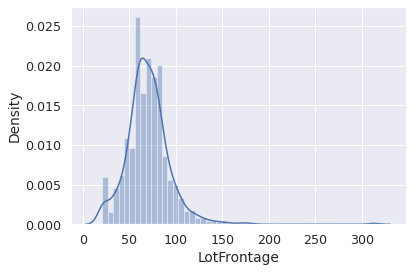

In [95]:
sns.distplot(df_train['LotFrontage'])

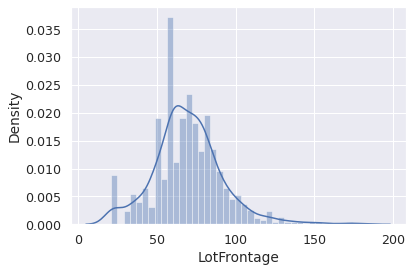

In [103]:
df_train_no_outliers = df_train[df_train['LotFrontage'] <= 250]
sns.distplot(df_train[df_train['LotFrontage'] <= 250]['LotFrontage'])

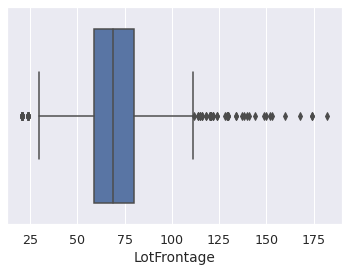

In [105]:
sns.boxplot(df_train[df_train['LotFrontage'] <= 250]['LotFrontage'])